<a href="https://colab.research.google.com/github/drsunithaev/Machine_Learning/blob/main/Assignment_20_Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APS Failure at Scania Trucks Data Set

In [ ]:
import pandas as pd
import numpy as np


## Read Data

In [ ]:
df = pd.read_csv("C:\\Users\\sunit\\Desktop\\iNeuron Programs\\Data Science\\datasets\\aps_failure_training_set.csv",skiprows=20,na_values=["na"])

## Study the data 

In [ ]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,60000.0,5.933650e+04,1.454301e+05,0.0,834.0,30776.0,48668.0,2.746564e+06
ab_000,13671.0,7.131885e-01,3.478962e+00,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,56665.0,3.560143e+08,7.948749e+08,0.0,16.0,152.0,964.0,2.130707e+09
ad_000,45139.0,1.906206e+05,4.040441e+07,0.0,24.0,126.0,430.0,8.584298e+09
ae_000,57500.0,6.819130e+00,1.615434e+02,0.0,0.0,0.0,0.0,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,59329.0,3.462714e+05,1.728056e+06,0.0,110.0,41098.0,167814.0,1.195801e+08
ee_008,59329.0,1.387300e+05,4.495100e+05,0.0,0.0,3812.0,139724.0,1.926740e+07
ee_009,59329.0,8.388915e+03,4.747043e+04,0.0,0.0,0.0,2028.0,3.810078e+06
ef_000,57276.0,9.057895e-02,4.368855e+00,0.0,0.0,0.0,0.0,4.820000e+02


In [ ]:
df.shape

(60000, 171)

## Preprocess the data 

In [ ]:
df['class'] = df['class'].replace(['neg','pos'],[0,1])

In [ ]:
df['class'].unique()

array([0, 1], dtype=int64)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sunit\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


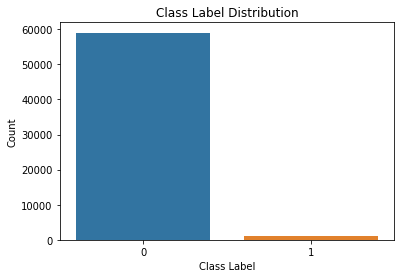

In [ ]:
sns.barplot(df['class'].unique(),df['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()


In [ ]:
std_0 = []
info = df.describe()
for i in df.columns:
    if info[i]['std']==0:
        std_0.append(i)
        print(i)
df.drop(std_0,axis=1,inplace=True)

cd_000


In [ ]:
nan_count = {k:list(df.isna().sum()*100/df.shape[0])[i] for i,k in enumerate(df.columns)}
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

C:\Users\sunit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


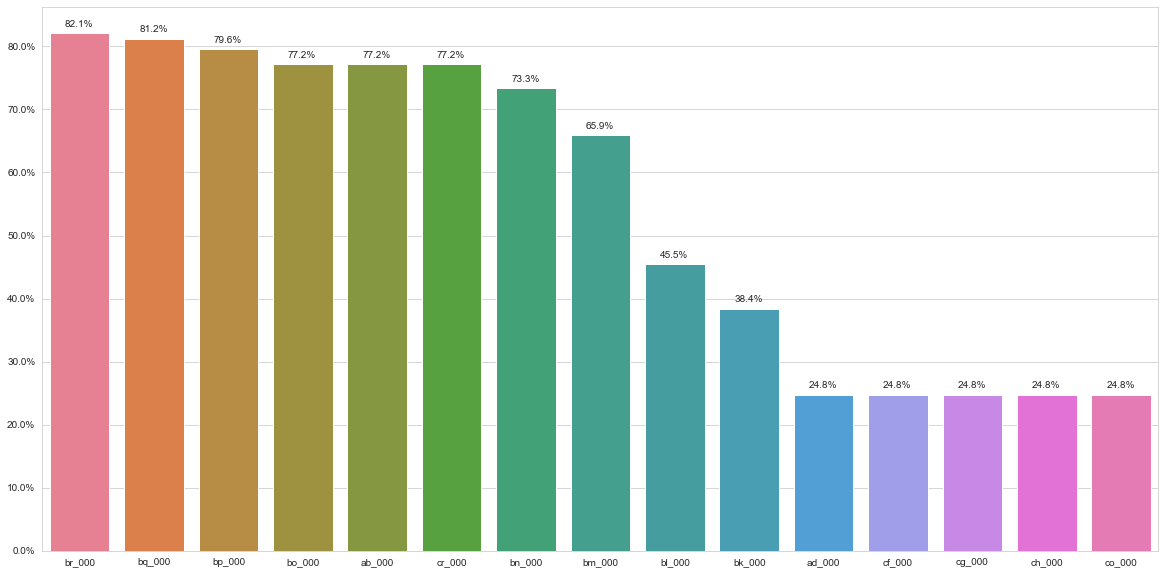

In [ ]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))
plot = sns.barplot(x= list(nan_count.keys())[:15],y = list(nan_count.values())[:15],palette="husl",errcolor='0.3')

for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

In [ ]:
df = df.dropna(axis = 1, thresh=18000)

In [ ]:
na_5 = [k for k,v in nan_count.items() if v < 5]
df = df.dropna(subset=na_5)

In [ ]:
df = df.reset_index(drop=True)

C:\Users\sunit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


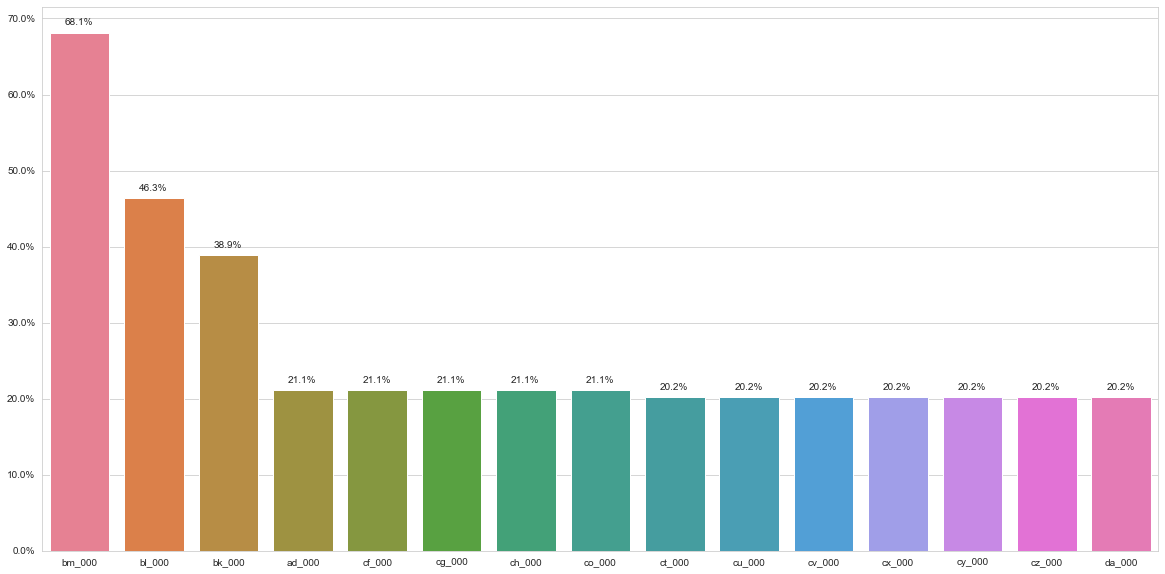

In [ ]:
nan_count1 = {k:list(df.isna().sum()*100/df.shape[0])[i] for i,k in enumerate(df.columns)}
nan_count1 = {k: v for k, v in sorted(nan_count1.items(), key=lambda item: item[1],reverse=True)}
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))
plot = sns.barplot(x= list(nan_count1.keys())[:15],y = list(nan_count1.values())[:15],palette="husl",errcolor='0.3')

for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

In [ ]:
df.shape

(55973, 163)

In [ ]:
na_70 = list(nan_count.keys())[:7]
removed_features = na_70 + std_0


In [ ]:
removed_features

['br_000',
 'bq_000',
 'bp_000',
 'bo_000',
 'ab_000',
 'cr_000',
 'bn_000',
 'cd_000']

In [ ]:
y_train = df['class']
X_train = df.drop('class',axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
#from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer

In [ ]:
from sklearn.impute import IterativeImputer

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
def imputation(df,mis_col):
       
    # Using sklearn's SimpleImputer
    median_imputer = SimpleImputer(missing_values=np.NaN , strategy='median',copy=True)

    # Creating a new dataframe of imputed values
    median_df = median_imputer.fit_transform(df[mis_col])
    df1 = df.copy()
    df1[mis_col] = median_df

    # Performing Model-Based Imputation
    mice_imputer = IterativeImputer(estimator=Ridge(random_state=0),
                                    random_state=0)
    imputed_df = pd.DataFrame(data = mice_imputer.fit_transform(df1) , columns= df1.columns )

    return imputed_df , median_imputer , mice_imputer

In [ ]:
median_imputed_features = [k for k,v in nan_count.items() if v >= 5 and v < 15]
imputed_x_train , MEDIAN_imputer , MICE_imputer = imputation( X_train , median_imputed_features )

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78277e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.18108e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78027e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78036e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78046e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78149e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78084e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78081e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78073e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78074e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78095e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78083e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78081e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78079e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78027e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78106e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78104e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78111e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78132e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.78093e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36116e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36156e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36221e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36184e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36446e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36468e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.37256e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36257e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36871e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.3615e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36136e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36847e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.36117e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.75447e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.43284e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.07108e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.07117e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.07103e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.07111e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.07164e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11776e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11774e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11774e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11774e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11774e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.12167e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11718e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11967e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.1264e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11943e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11619e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.1211e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.13857e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11836e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.12458e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66531e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66554e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66511e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.6651e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66511e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.67121e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.67119e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.67115e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.67115e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.68748e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66513e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66512e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66511e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66759e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.68043e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.6698e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66983e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66994e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66974e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.66972e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52859e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53002e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53009e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52889e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53126e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53607e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52942e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53126e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52808e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5285e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.54377e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52734e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.30022e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.62531e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.57029e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.90462e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.9064e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.90463e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.90484e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.92516e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52814e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52813e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52811e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52812e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52812e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52779e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52822e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53232e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5302e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52682e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.54237e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52926e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53365e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52731e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52749e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52391e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52391e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52392e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52403e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52442e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53343e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5447e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.54423e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5442e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.54413e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.54994e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52735e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52756e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52752e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52741e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53164e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52619e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52361e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.76031e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.77741e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5243e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52561e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52326e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52835e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.55738e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52402e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53627e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52306e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52305e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52353e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.57038e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52979e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5319e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52494e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52322e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.93073e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.93056e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.93342e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.1771e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.93258e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52459e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52529e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52494e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52458e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53311e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5233e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53011e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52314e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52316e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52333e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52364e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52396e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5236e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53831e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53145e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52501e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52496e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52466e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.5246e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52452e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.55277e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.55269e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.55268e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.55269e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.55268e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53001e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52966e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52955e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52984e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53009e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.52426e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.779e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.81255e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.77112e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.67335e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_mode

In [ ]:
df_test = pd.read_csv("C:\\Users\\sunit\\Desktop\\iNeuron Programs\\Data Science\\datasets\\aps_failure_test_set.csv",skiprows=20,na_values=["na"])

In [ ]:
df_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [ ]:
df_test['class'] = df_test['class'].replace(['neg','pos'],[0,1])

In [ ]:
y_test = df_test['class']
X_test = df_test.drop('class',axis=1)

In [ ]:
X_test = X_test.drop(removed_features , axis=1)

In [ ]:
X_test[median_imputed_features] = MEDIAN_imputer.transform(X_test[median_imputed_features])
    
X_test = pd.DataFrame(data = MICE_imputer.transform(X_test) , columns= X_test.columns )
    

In [ ]:
from collections import Counter

In [ ]:
def Identifier_Bin_count(x):
    """
    This function finds the identifiers
    and the number of bins in each identifier
    """
    prefix = []
    # For each feature name, find it's Identifier and count  
    for name in x.columns:
        prefix.append(name.split('_')[0])
    counter = Counter(prefix)
    return list(counter.keys()),list(counter.values())

feature_prefix , bin_count = Identifier_Bin_count(imputed_x_train)

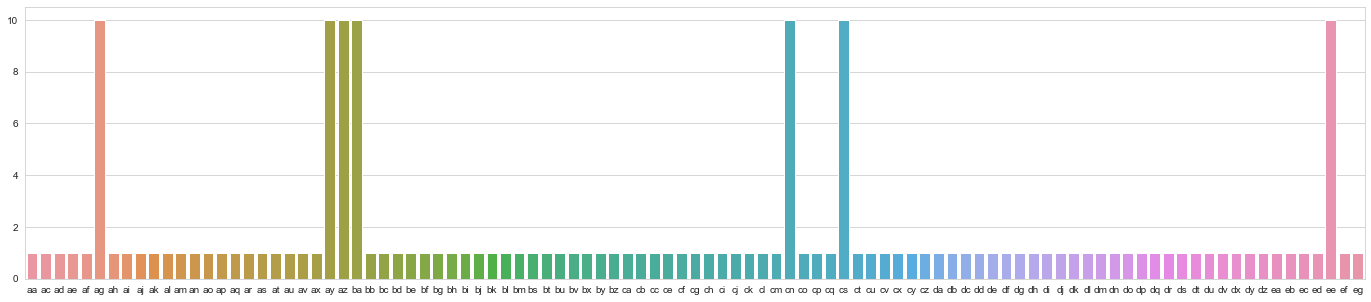

In [ ]:
plt.figure(figsize=(24,5))
sns.barplot(x = feature_prefix,y = bin_count)
plt.show()

In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from imblearn.pipeline import Pipeline

In [ ]:
# df = pd.DataFrame( data = min_max.fit_transform(df) , columns = df.columns )
   

In [ ]:
def balance_data(df,label):
    over = SMOTE(sampling_strategy=0.3)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    df, label = pipeline.fit_resample(df, label)
    return df, label

#X_train , y_train = balance_data(X_train , y_train)

# Models

In [ ]:
'''
1.	Logistic regression
2.	SVM
3.	Decision tree
4.	Random forest
5.	Adaboost
6.	gradient boost
7.	XGboost

'''

'\n1.\tLogistic regression\n2.\tSVM\n3.\tDecision tree\n4.\tRandom forest\n5.\tAdaboost\n6.\tgradient boost\n7.\tXGboost\n\n'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
#!pip install xgboost

In [ ]:
import xgboost

In [ ]:
model_lr = LogisticRegression()
model_svc =SVC() 
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_ada = AdaBoostClassifier()
model_gbt = GradientBoostingClassifier()

In [ ]:
model_lr.fit(imputed_x_train, y_train)

C:\Users\sunit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
model_lr.score(imputed_x_train, y_train)

0.9926571739946045

In [ ]:
model_lr.score(X_test, y_test)

0.9848125

In [ ]:
y_predict_lr = model_lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_predict_lr)

0.9848125

In [ ]:
model_svc.fit(imputed_x_train, y_train )

SVC()

In [ ]:
model_svc.score(imputed_x_train, y_train)

0.9894056062744537

In [ ]:
y_predict_svc = model_svc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict_svc)

0.976625

In [ ]:
model_dt.fit(imputed_x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict_dt = model_dt.predict(X_test)

In [ ]:
model_dt.score(imputed_x_train, y_train)

1.0

In [ ]:
model_dt.score(X_test, y_test)

0.984625

In [ ]:
model_rf.fit(imputed_x_train, y_train)


RandomForestClassifier()

In [ ]:
y_predict_rf = model_rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict_rf)

0.991375

In [ ]:
model_ada = AdaBoostClassifier()
model_ada.fit(imputed_x_train, y_train)

AdaBoostClassifier()

In [ ]:
y_predict_ada = model_ada.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict_ada)

0.98575

In [ ]:
model_xgb=xgboost.XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred_xgb=model_xgb.predict(X_test)

C:\Users\sunit\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
accuracy_score(y_test, y_pred_xgb)

0.992375